In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [33]:
# 导入数据
df_calories = pd.read_csv("./data/calories.csv")
print(df_calories.head())

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0


In [34]:
df_exercise = pd.read_csv("./data/exercise.csv")
print(df_exercise.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8


In [35]:
# 合并数据集
df = pd.concat([df_exercise, df_calories.Calories], axis=1)
print(df.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


In [36]:
# 数据表纬度
df.shape

(15000, 9)

In [37]:
# 查看数据信息
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [38]:
# 判断是否有缺失值
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [39]:
# 查看columns
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [40]:
constant_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

/var/folders/n8/4szlkhkj0_dfl6kp70d1j05w0000gn/T/ipykernel_2791/1573668965.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],shade = True,label = col,alpha = 0.7)
/var/folders/n8/4szlkhkj0_dfl6kp70d1j05w0000gn/T/ipykernel_2791/1573668965.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],shade = True,label = col,alpha = 0.7)
/var/folders/n8/4szlkhkj0_dfl6kp70d1j05w0000gn/T/ipykernel_2791/1573668965.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],shade = True,label = col,alpha = 0.7)
/var/folders/n8/4szlkhkj0_dfl6kp70d1j05w0000gn/T/ipykernel_2791/1573668965.py:13: FutureWarning: 

`shade`

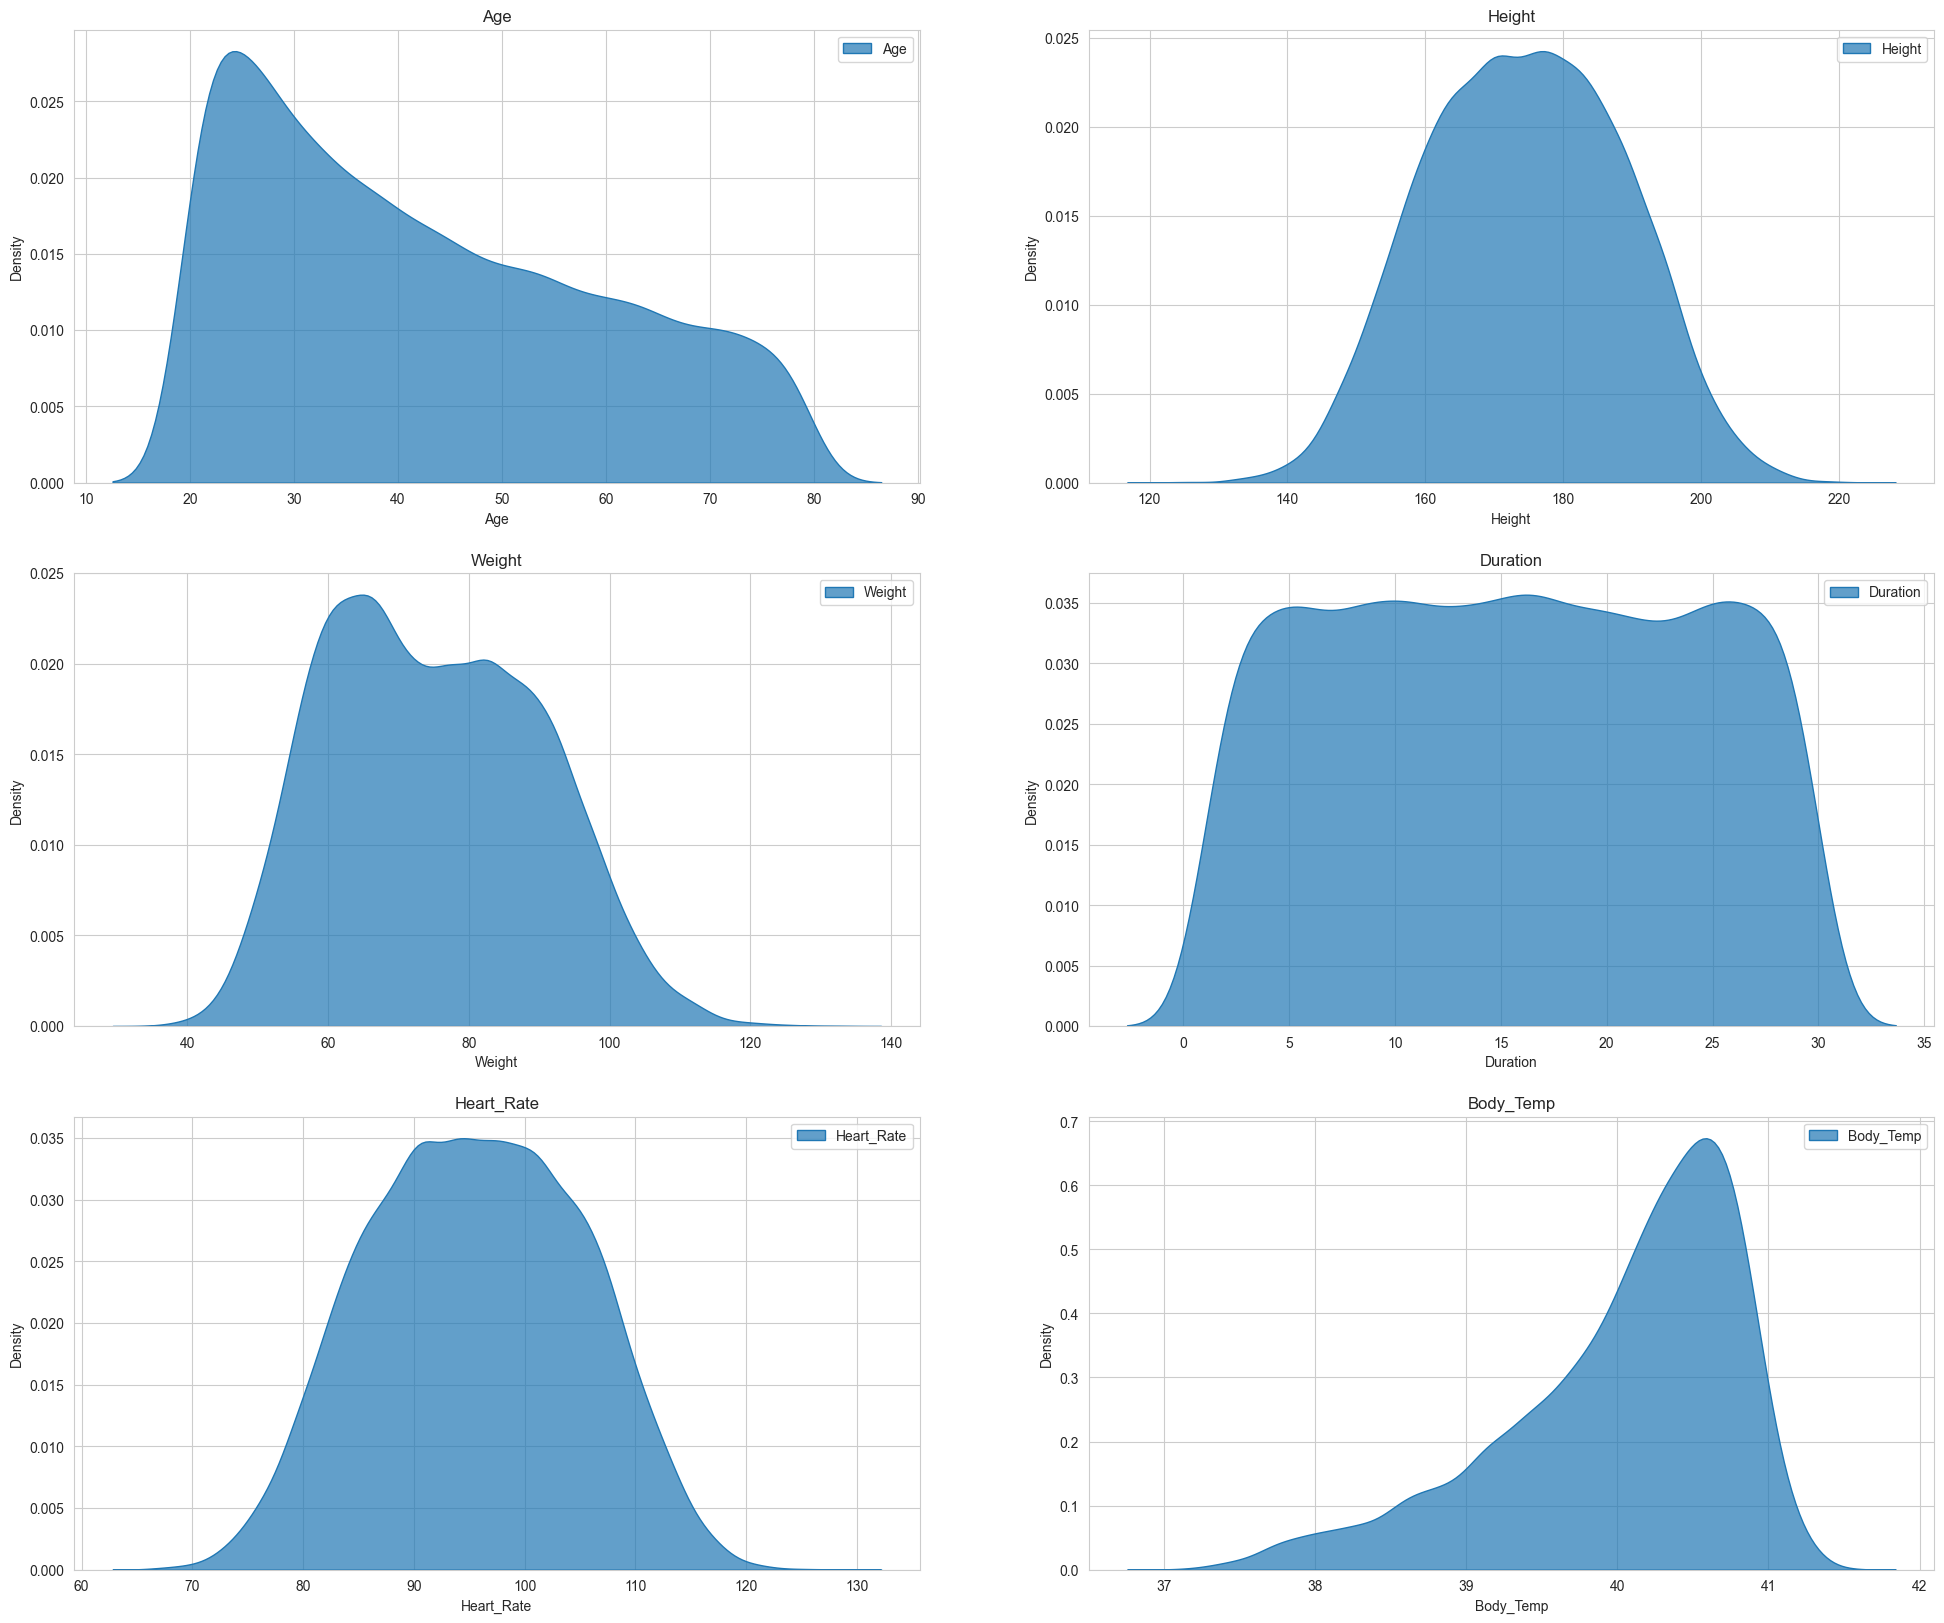

In [41]:
# 绘制概率密度图
def kde_plot_array(df):
    """
    绘制概率密度图矩阵函数
    绘制各个字段的概率密度分布，最终返回图像的show()
    """
    plt.figure(figsize = (24,20))
    # subplots_adjust(left = 0,bottom = 0,top = 1.4,right = 1)
    for num,col in zip(range(len(df.columns)),df.columns):
        plt.subplot(int(round(len(df.columns)/2,0)),2,num+1)
        # sns.set(font = 'FangSong',font_scale = 1.6)
        # index = columns
        sns.kdeplot(df[col],shade = True,label = col,alpha = 0.7)
        plt.legend()
        plt.title('{}'.format(col))
    return plt.show()
kde_plot_array(df[constant_features])

<Axes: xlabel='count', ylabel='Gender'>

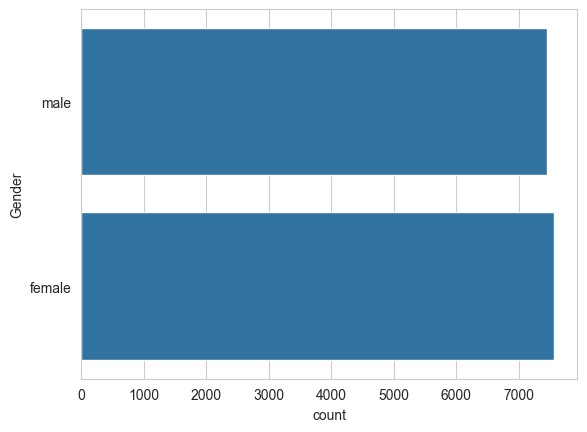

In [42]:
# 性别特征分布
sns.countplot(df['Gender'])

/var/folders/n8/4szlkhkj0_dfl6kp70d1j05w0000gn/T/ipykernel_2791/4104799869.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/var/folders/n8/4szlkhkj0_dfl6kp70d1j05w0000gn/T/ipykernel_2791/4104799869.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/var/folders/n8/4szlkh

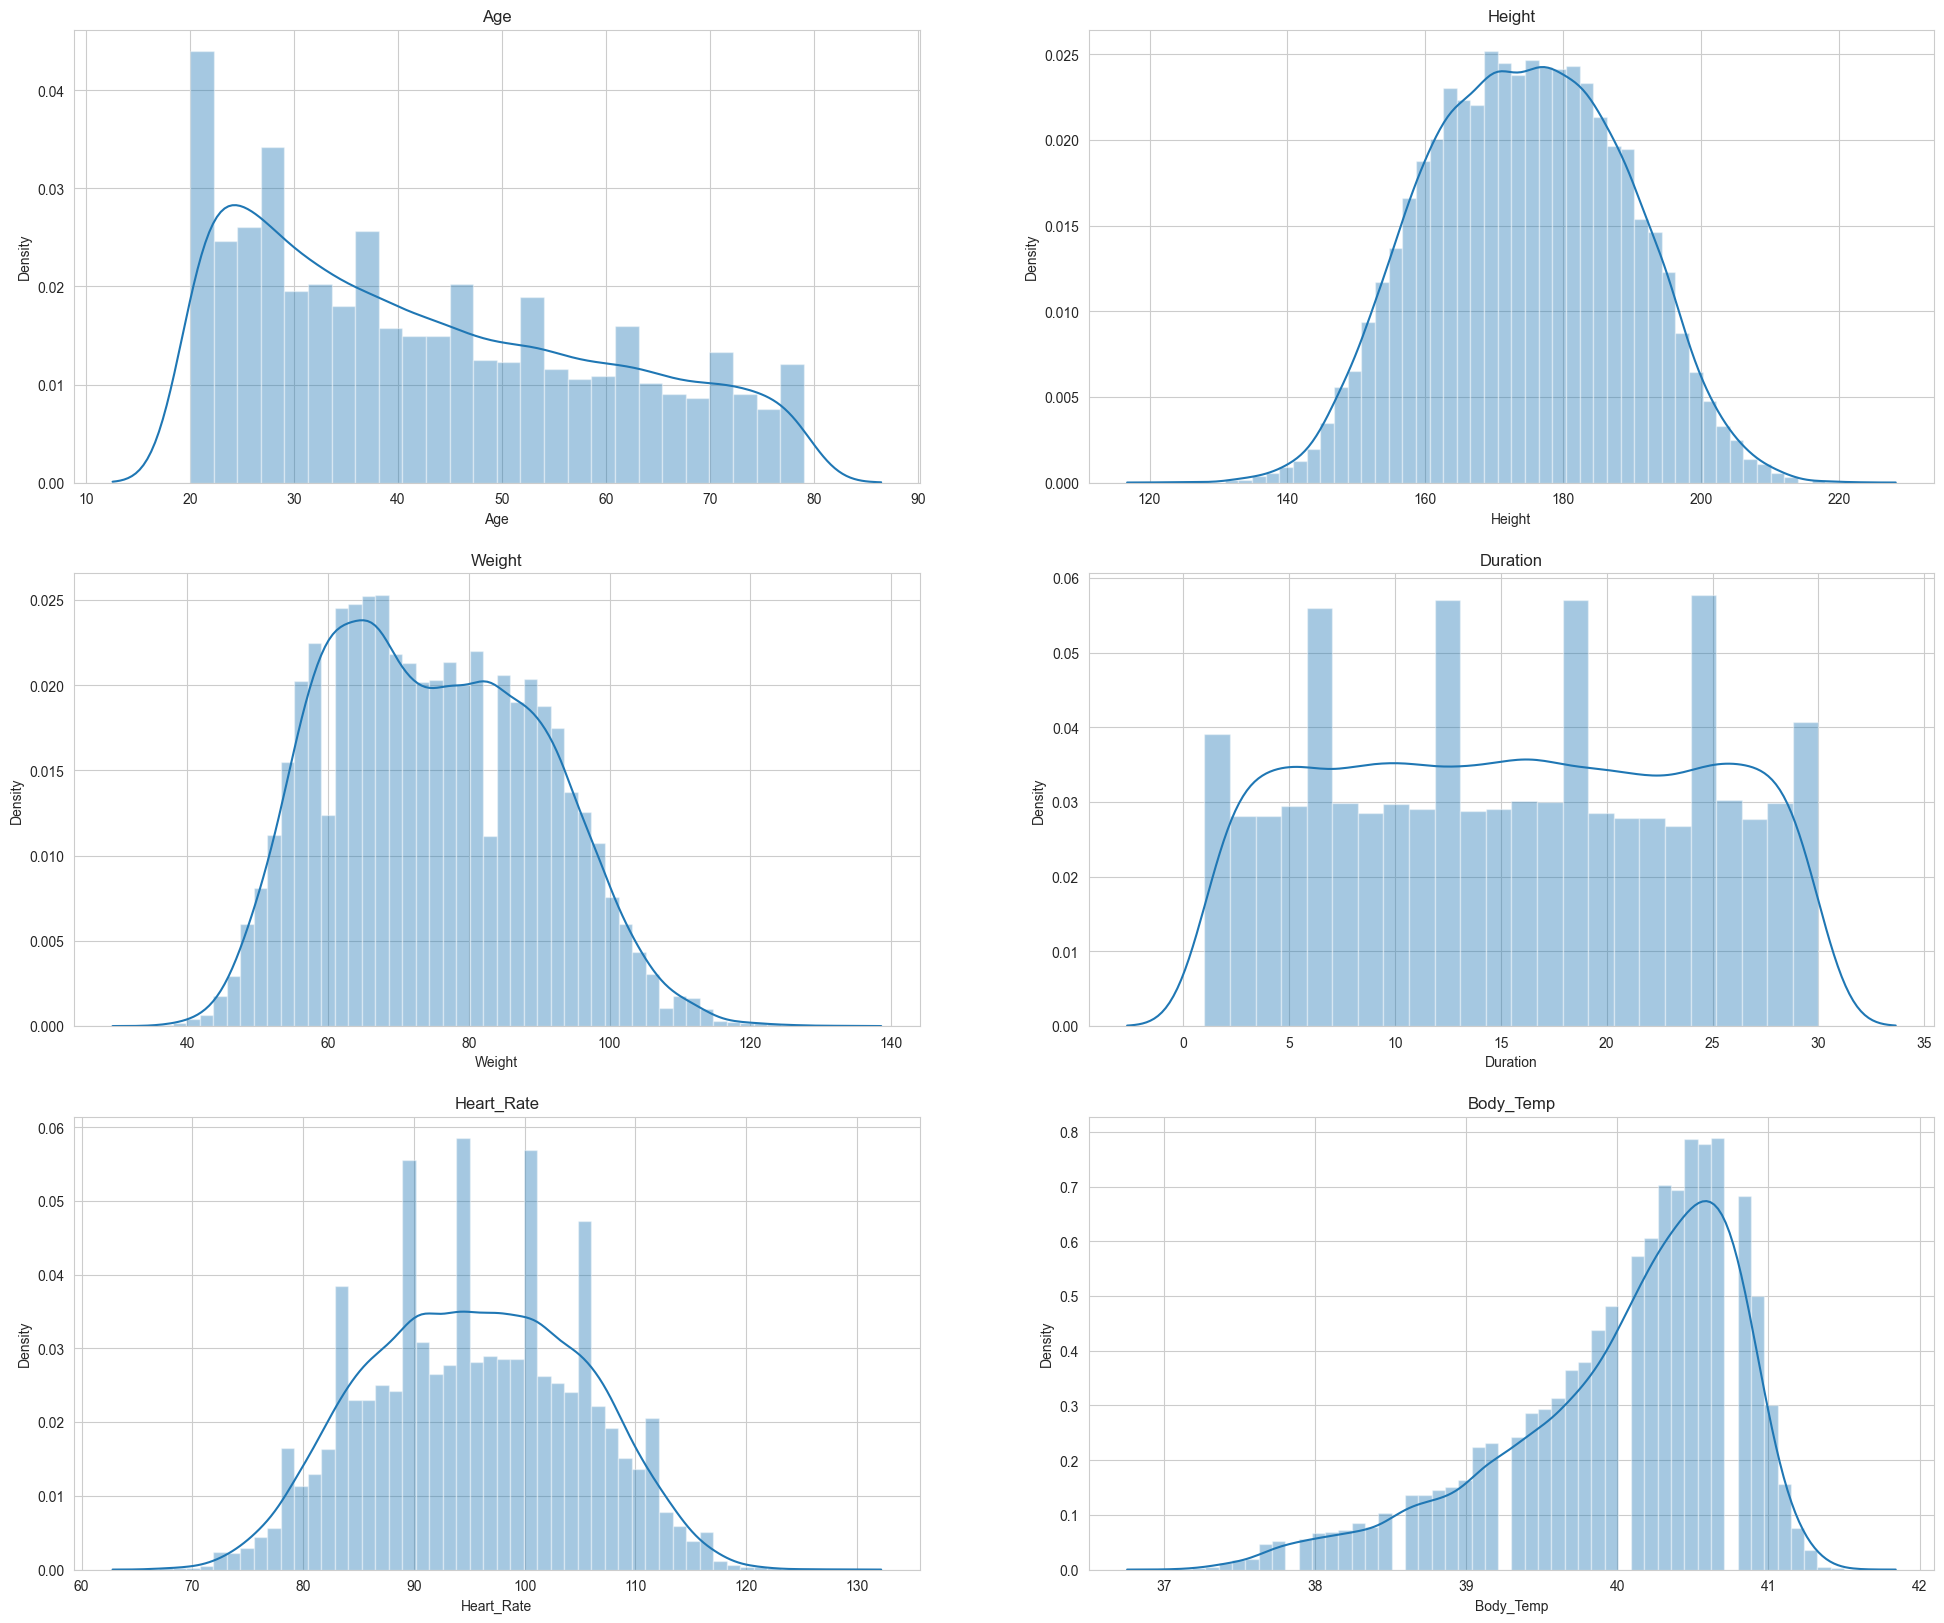

In [43]:
# 连续变量特征分布
def display(df):
    '''用seaborn的displot函数查看变量分布'''
    plt.figure(figsize = (24,20))
    # subplots_adjust(left = 0,bottom = 0,top = 1.4,right = 1)
    for num,col in zip(range(len(df.columns)),df.columns):

        plt.subplot(int(round(len(df.columns)/2,0)),2,num+1)
        # plt.figure(figsize=(20,12))
        # sns.set(font = 'FangSong',font_scale = 1.6)
        # index = columns
        # sns.kdeplot(df[col],shade = True,label = col,alpha = 0.7)
        sns.distplot(df[col])
        # plt.legend()
        plt.title('{}'.format(col))
    return plt.show()

display(df[constant_features])

In [44]:
# 

In [45]:
#离散变量编码
df.replace({'Gender':{'male':0,"female":1}}, inplace = True)
df['Gender'].head()

/var/folders/n8/4szlkhkj0_dfl6kp70d1j05w0000gn/T/ipykernel_2791/2170651955.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'male':0,"female":1}}, inplace = True)


0    0
1    1
2    0
3    1
4    1
Name: Gender, dtype: int64

In [46]:
# 寻找数据相关性
correlation = df.corr()
correlation

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Gender,0.000687,1.000000,-0.003222,-0.710534,-0.783186,-0.003440,-0.011555,-0.007264,-0.022357
Age,-0.001827,-0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,-0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,-0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,-0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,-0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,-0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,-0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

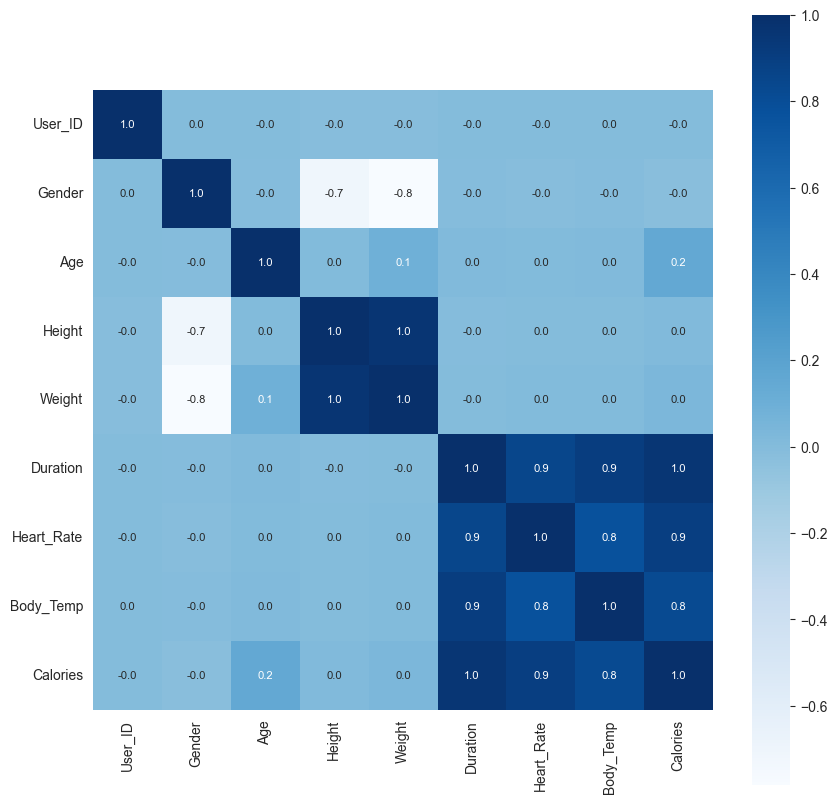

In [47]:
# 绘制相关系数矩阵
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [48]:
# 创建features 和 targets
X = df.drop(['User_ID','Calories'],axis=1).values
y = df.Calories

In [49]:
# 划分数据集
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 训练模型 随机森林
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
# 预测
rf_predictions = rf.predict(X_test)
rf_predictions

array([128.66, 223.21,  36.66, ..., 146.45,  23.65,  89.94])

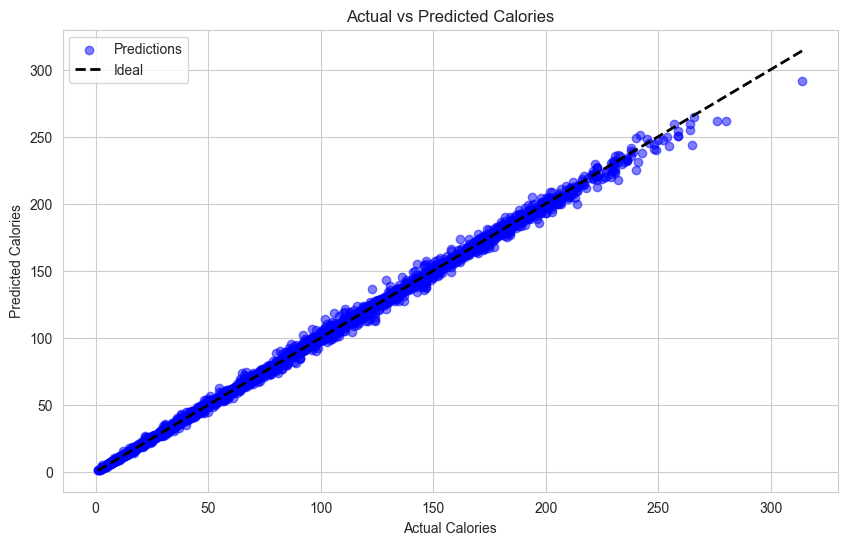

In [52]:
# 绘制散点图比较真实值和预测值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.legend()
plt.show()

In [53]:
# 评估
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R^2: {rf_r2}")

Random Forest MSE: 6.876160166666667
Random Forest R^2: 0.9982492876904432


In [54]:
rf_mae = np.mean(np.abs(y_test - rf_predictions))
rf_rmse = np.sqrt(rf_mse)
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest MAE: 1.6750500000000001
Random Forest RMSE: 2.6222433461955177


In [55]:
# 模型训练 XGBoost
model = XGBRegressor(random_state=42) #本次项目选用XGBoost算法
model.fit(X_train,y_train)
X_preds = model.predict(X_train)

In [56]:
preds = model.predict(X_test)   # 预测值
preds

array([125.58828 , 222.11377 ,  38.725952, ..., 144.3179  ,  23.425894,
        90.100494], dtype=float32)

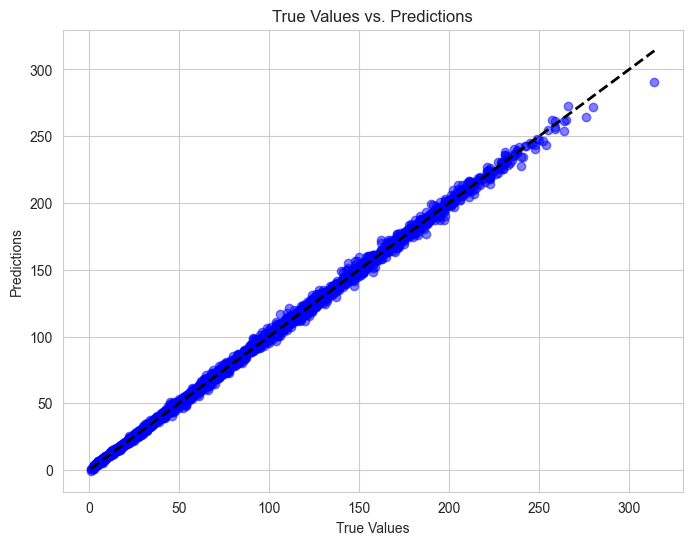

In [57]:
# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, color='blue', alpha=0.5)  # 真实值 vs. 预测值
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 对角线，用于参考
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

In [58]:
#

In [59]:
# 模型评估
# 平均绝对误差
MAE = metrics.mean_absolute_error(y_test,preds)
print("Mean Absolute Error = ",MAE)

Mean Absolute Error =  1.4833678883314132


In [60]:
# 均方根误差
RMSE = np.sqrt(metrics.mean_squared_error(y_test,preds))
print("Root Mean Squared Error = ",RMSE)

Root Mean Squared Error =  2.1704170134933394


In [61]:
# R^2系数
preds_R2_score = metrics.r2_score(y_test,preds)
print("R^2 Score = ",preds_R2_score)

R^2 Score =  0.998800624504713


In [62]:
# 构建预测系统

input_data = (0 , 20 , 175.0 ,  75.0 , 14.0 , 94.0 ,40.3)

# 转化为numpy数组
input_data_as_numpy_array = np.asarray(input_data)

# reshape 成array二维
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

print('卡路里消耗值为{} '.format(prediction[0]))

[51.216362]
卡路里消耗值为51.21636199951172 
